In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv('carevaluation.csv',header=None)

In [24]:
df.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [25]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [26]:
df.shape

(1728, 7)

In [27]:
col_names = ['buying','miant','doors','persons','lug_boot','safety','class']
df.columns = col_names

df

,buying,miant,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   miant     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [29]:
df.isnull().value_counts()

buying  miant  doors  persons  lug_boot  safety  class
False   False  False  False    False     False   False    1728
Name: count, dtype: int64

In [30]:
for col in col_names:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
miant
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [31]:
df.isnull().sum()

buying      0
miant       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [32]:
X = df.drop(['class'],axis=1)
y = df['class']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [34]:
X_train.shape

(1157, 6)

In [35]:
X_train

,buying,miant,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high
...,...,...,...,...,...,...
1130,med,med,3,more,med,high
1294,med,low,5more,more,big,med
860,high,low,5more,more,med,high
1459,low,high,4,2,small,med


In [36]:
X_test.shape

(571, 6)

In [37]:
X_test

,buying,miant,doors,persons,lug_boot,safety
599,high,high,4,2,med,high
1201,med,low,2,4,med,med
628,high,high,5more,2,big,med
1498,low,high,5more,4,med,med
1263,med,low,4,more,med,low
...,...,...,...,...,...,...
1034,med,high,4,2,big,high
341,vhigh,low,2,4,big,high
147,vhigh,high,3,4,med,low
360,vhigh,low,3,4,small,low


In [38]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying','miant','doors','persons','lug_boot','safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

X_train

,buying,miant,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2
...,...,...,...,...,...,...
1130,4,4,1,1,1,2
1294,4,3,2,1,3,3
860,2,3,2,1,1,2
1459,3,2,4,3,2,3


In [39]:
X_test.head()

,buying,miant,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)


from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision trees : {}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score with 10 decision trees : 0.9457092819614711


In [41]:
rfc_100 = RandomForestClassifier(n_estimators=100,random_state=0)

rfc_100.fit(X_train,y_train)

y_pred100 = rfc_100.predict(X_test)

print('Model accuracy score with 100 decision-trees : {}'.format(accuracy_score(y_test,y_pred100)))

Model accuracy score with 100 decision-trees : 0.9457092819614711


In [42]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)

clf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
feature_scores = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
miant       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

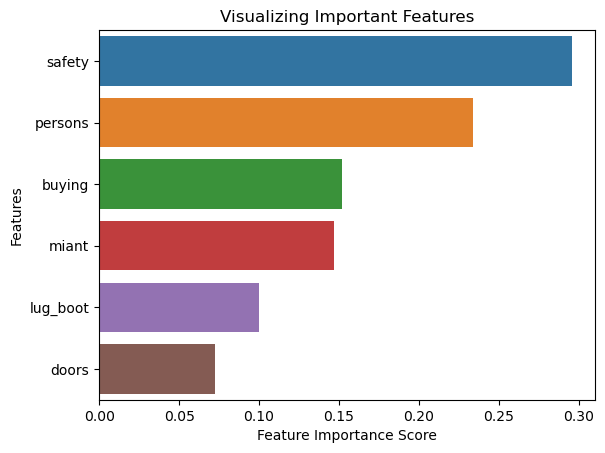

In [44]:
sns.barplot(x=feature_scores,y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")
plt.show()

In [45]:
X = df.drop(['class','doors'],axis=1)
y = df['class']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [48]:
encoder = ce.OrdinalEncoder(cols=['buying','miant','persons','lug_boot','safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [49]:
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print('Model accuracy score with doors variable removed : {}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score with doors variable removed : 0.9264448336252189


In [50]:
clf100 = RandomForestClassifier(n_estimators=100,random_state=0)

clf100.fit(X_train,y_train)
y_pred100 = clf100.predict(X_test)

print('Model accuracy score with doors variable removed : {}'.format(accuracy_score(y_test,y_pred100)))

Model accuracy score with doors variable removed : 0.9264448336252189
